In [28]:
import csv
import math

cluster = "cannon"

filename = open('/n/holylabs/LABS/rc_admin/Lab/pedmon/interactive-stats/data/%s.csv' % cluster,'r')

In [29]:
file = csv.DictReader(filename)

jobid = []
user = []
account = []
jobname = []

for col in file:
    jobid.append(col['JobID'])
    user.append(col['User'])
    account.append(col['Account'])
    jobname.append(col['JobName'])

In [30]:
jobcnt = 0
salloccnt = 0
oodcnt = 0
jobcnta = {}
jobcntu = {}
salloccnta = {}
salloccntu = {}
oodcnta = {}
oodcntu = {}

for i in range(len(jobid)):
    jobcnt = jobcnt + 1
    if jobcnta.get(account[i]) == None:
        jobcnta.update({account[i]: 1})
        salloccnta.update({account[i]: 0})
        oodcnta.update({account[i]: 0})
        if "interactive" in jobname[i]:
            salloccnt = salloccnt +1
            salloccnta[account[i]] = salloccnta[account[i]] + 1
        elif "dashboard" in jobname[i]:
            oodcnt = oodcnt +1
            oodcnta[account[i]] = oodcnta[account[i]] + 1
    else:
        jobcnta[account[i]] = jobcnta[account[i]] + 1
        if "interactive" in jobname[i]:
            salloccnt = salloccnt +1
            salloccnta[account[i]] = salloccnta[account[i]] + 1
        elif "dashboard" in jobname[i]:
            oodcnt = oodcnt +1
            oodcnta[account[i]] = oodcnta[account[i]] + 1
            
    if jobcntu.get(user[i]) == None:
        jobcntu.update({user[i]: 1})
        salloccntu.update({user[i]: 0})
        oodcntu.update({user[i]: 0})
        if "interactive" in jobname[i]:
            salloccntu[user[i]] = salloccntu[user[i]] + 1
        elif "dashboard" in jobname[i]:
            oodcntu[user[i]] = oodcntu[user[i]] + 1
    else:
        jobcntu[user[i]] = jobcntu[user[i]] + 1
        if "interactive" in jobname[i]:
            salloccntu[user[i]] = salloccntu[user[i]] + 1
        elif "dashboard" in jobname[i]:
            oodcntu[user[i]] = oodcntu[user[i]] + 1
            
print ("Total Number of Jobs:", jobcnt, "Total Number of salloc Jobs:", salloccnt, "Total Number of OOD Jobs:", oodcnt)
print ("Percent salloc:", float(salloccnt)/float(jobcnt)*100, "Percent OOD:", float(oodcnt)/float(jobcnt)*100)

Total Number of Jobs: 21109208 Total Number of salloc Jobs: 37098 Total Number of OOD Jobs: 34113
Percent salloc: 0.175743211209061 Percent OOD: 0.1616024627735915


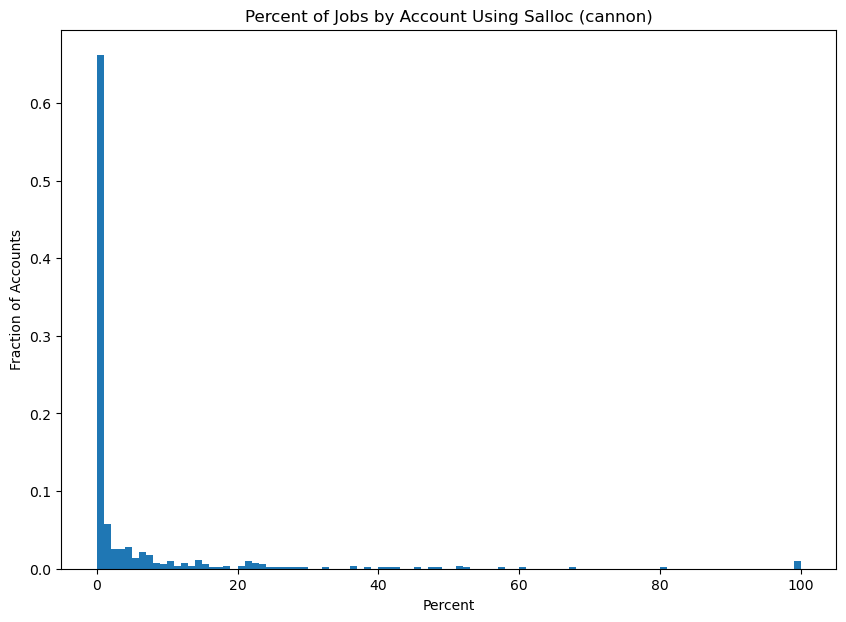

In [35]:
from matplotlib import pyplot as plt
import numpy as np

jobcntal = []
for key in jobcnta.keys():
    jobcntal.append(jobcnta[key])
    
salloccntal = []
for key in salloccnta.keys():
    salloccntal.append(salloccnta[key])
    
persalloca = []
for i in range(len(jobcntal)):
    persalloca.append(float(salloccntal[i])/float(jobcntal[i])*100)
    
fig, interact = plt.subplots(figsize = (10, 7))
interact.hist(persalloca, bins = 100, density = True)
plt.xlabel("Percent")
plt.ylabel("Fraction of Accounts")
plt.title("Percent of Jobs by Account Using Salloc (%s)" % cluster)

plt.show()

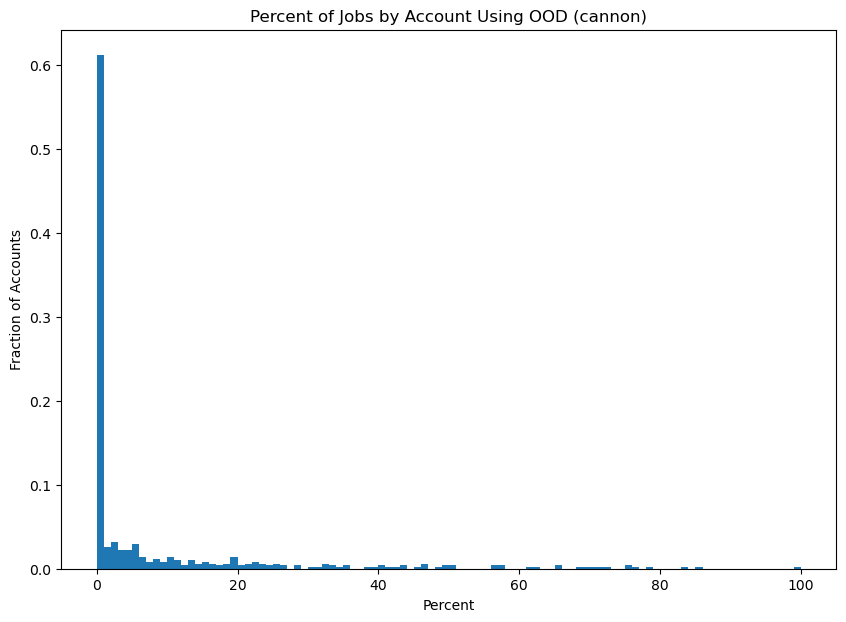

In [36]:
oodcntal = []
for key in oodcnta.keys():
    oodcntal.append(oodcnta[key])
    
perooda = []
for i in range(len(jobcntal)):
    perooda.append(float(oodcntal[i])/float(jobcntal[i])*100)
    
fig, interact = plt.subplots(figsize = (10, 7))
interact.hist(perooda, bins = 100, density = True)
plt.xlabel("Percent")
plt.ylabel("Fraction of Accounts")
plt.title("Percent of Jobs by Account Using OOD (%s)" % cluster)

plt.show()

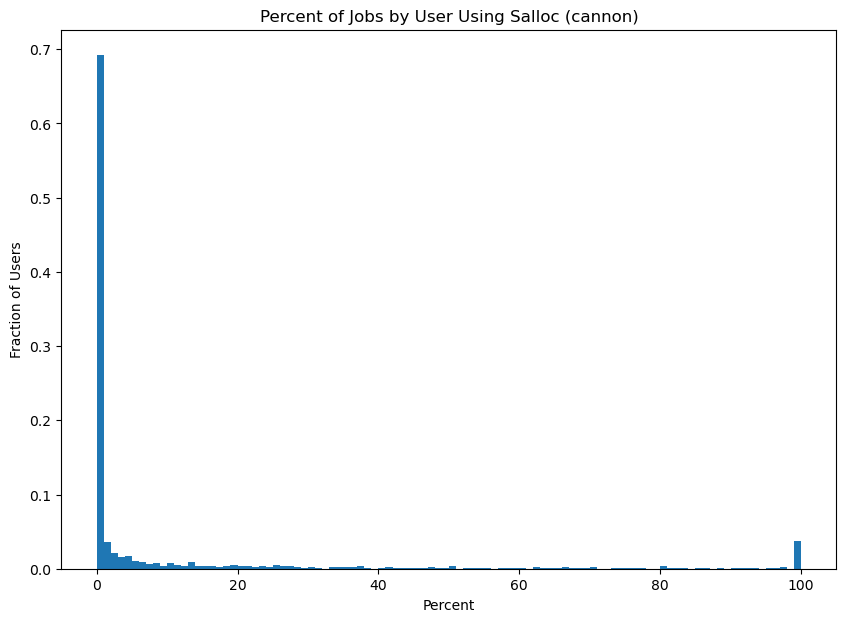

In [37]:
jobcntul = []
for key in jobcntu.keys():
    jobcntul.append(jobcntu[key])
    
salloccntul = []
for key in salloccntu.keys():
    salloccntul.append(salloccntu[key])
    
persallocu = []
for i in range(len(jobcntul)):
    persallocu.append(float(salloccntul[i])/float(jobcntul[i])*100)
    
fig, interact = plt.subplots(figsize = (10, 7))
interact.hist(persallocu, bins = 100, density = True)
plt.xlabel("Percent")
plt.ylabel("Fraction of Users")
plt.title("Percent of Jobs by User Using Salloc (%s)" % cluster)

plt.show()

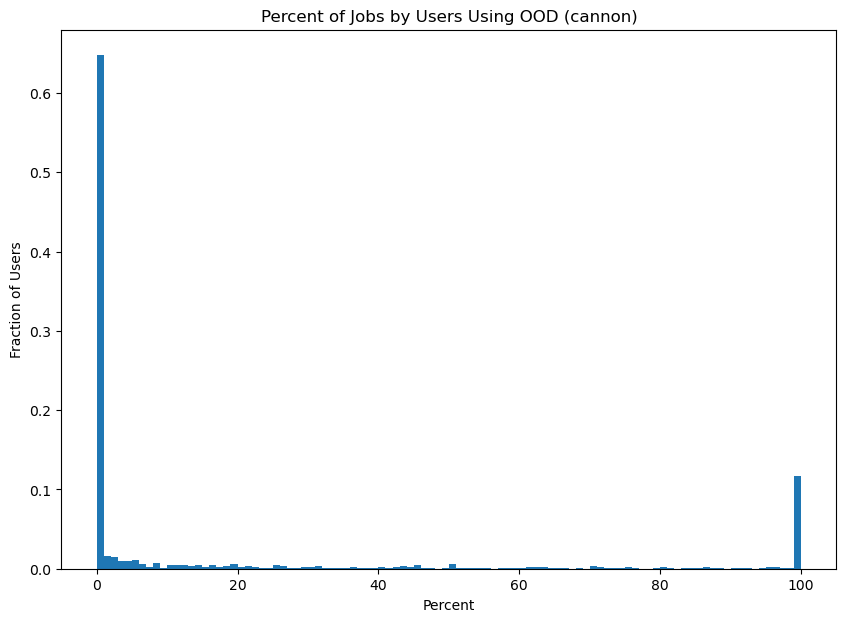

In [38]:
oodcntul = []
for key in oodcntu.keys():
    oodcntul.append(oodcntu[key])
    
peroodu = []
for i in range(len(jobcntul)):
    peroodu.append(float(oodcntul[i])/float(jobcntul[i])*100)
    
fig, interact = plt.subplots(figsize = (10, 7))
interact.hist(peroodu, bins = 100, density = True)
plt.xlabel("Percent")
plt.ylabel("Fraction of Users")
plt.title("Percent of Jobs by Users Using OOD (%s)" % cluster)

plt.show()